In [ ]:
# seaborn is a python data visualisation library built on top of matplotlib
# unlike matpltlib seaborn make assumptions on what we want, we can get same plot with just 1 line of code

In [ ]:
# pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# in jupyter notebook for auto reload
# reload_ext autoreload
# autoreload 2

In [ ]:
print(sns.get_dataset_names()) # builtin seaborn datasets 

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
type(df)

pandas.core.frame.DataFrame

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


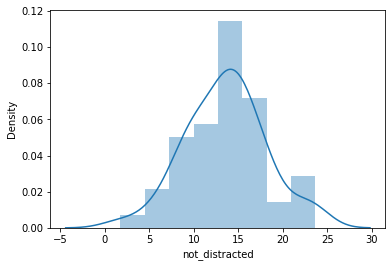

In [ ]:
# Distribution plot - a way to look at univariate distributions
sns.distplot(df['not_distracted'], kde=True) # kde - kernel density estimation(the line in the graph)
# it gives histogram plot
# kde provides estimation of totla resutls in datasets

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


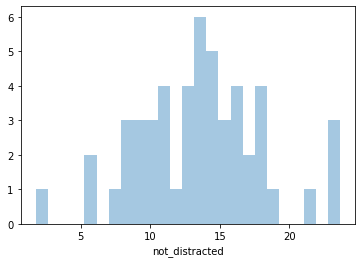

In [ ]:
sns.distplot(df['not_distracted'], kde=False, bins=25)
# bin is a bucket used to divide data between diff intervals

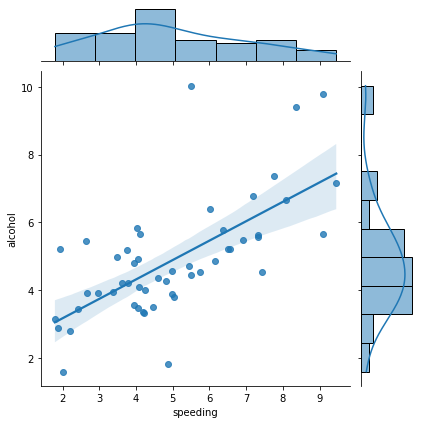

In [ ]:
# joint plot
# it is used to compare 2 distribution and plots as scatter plot
sns.jointplot(x='speeding', y='alcohol', data=df, kind = 'reg') # kind  = generate regression line
# sns.jointplot(x='speeding', y='alcohol', data=df, kind = 'kde')
# sns.jointplot(x='speeding', y='alcohol', data=df, kind = 'hex')

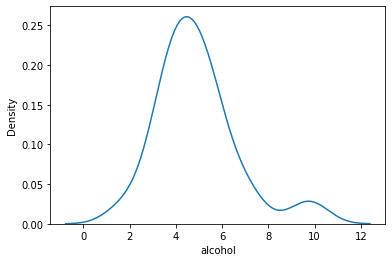

In [ ]:
# KDE plot
sns.kdeplot(df['alcohol'])

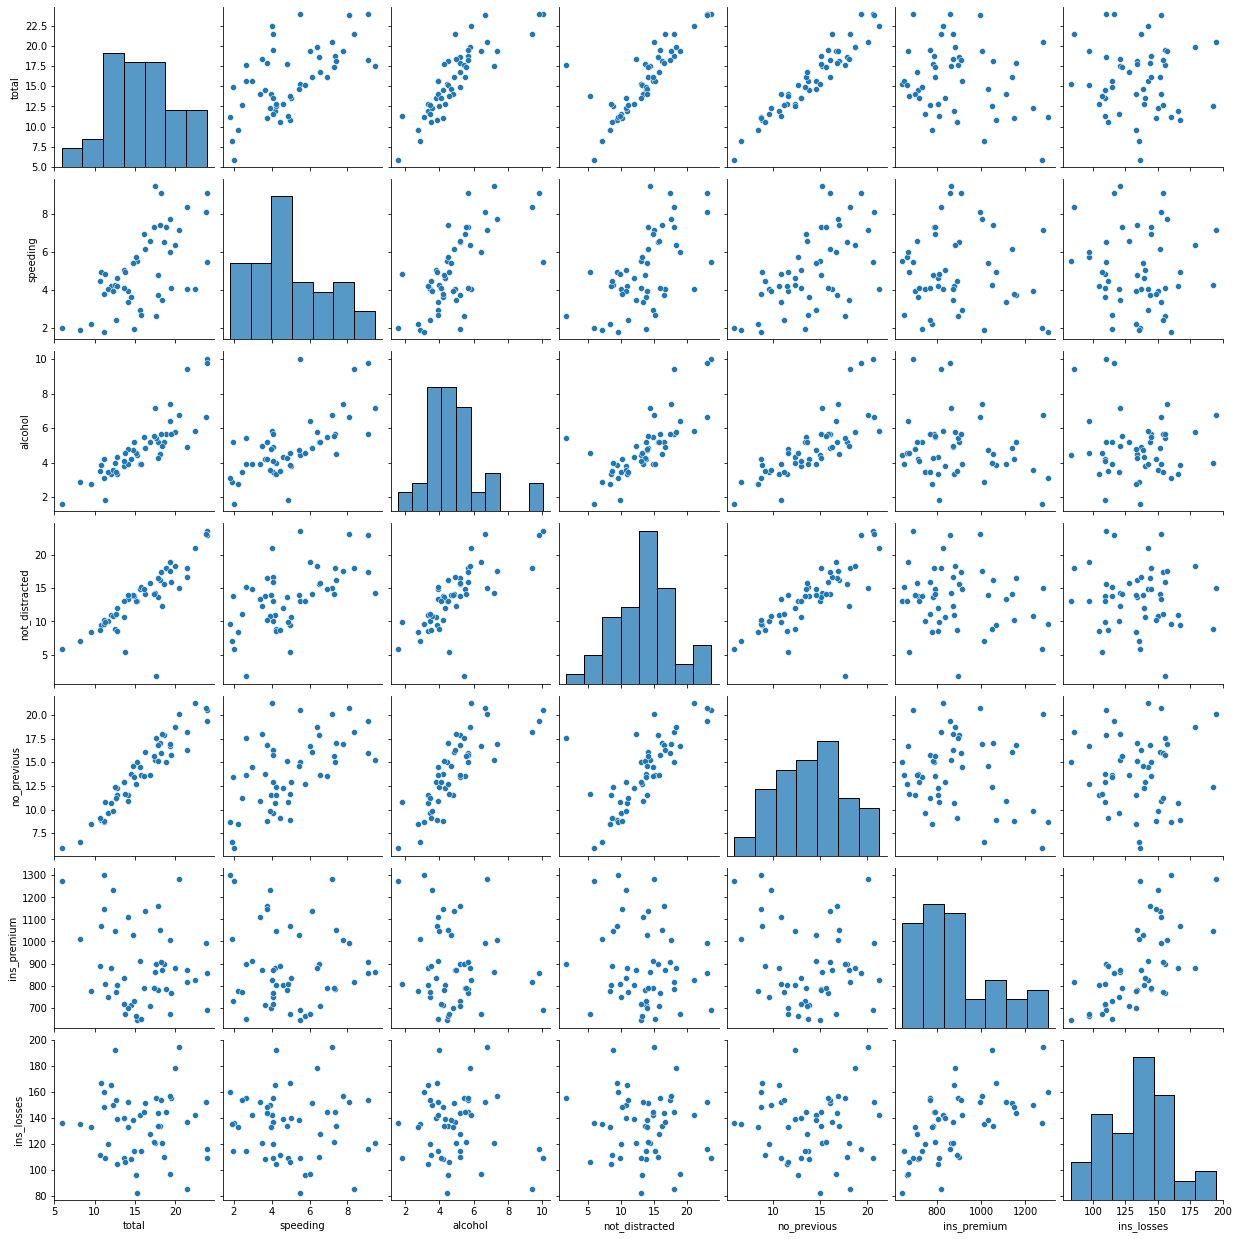

In [ ]:
# pairplot
# it plots relationships across entire dataframe numerical values
sns.pairplot(df)

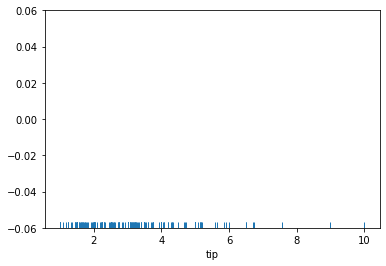

In [ ]:
df2 = sns.load_dataset('tips')
# Rug plot
# it will plot single column of data points in a dataframe as sticks
sns.rugplot(df2['tip'])

<Figure size 576x288 with 0 Axes>

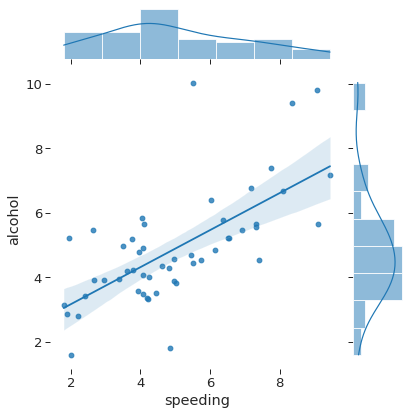

In [ ]:
# styling
sns.set_style('ticks') # options are white, darkgrid , dark, whitegrid, ticks

plt.figure(figsize=(8,4))
sns.set_context('paper', font_scale=1.5) #options - talk, poster, paper

sns.jointplot(x='speeding',y='alcohol', data=df, kind='reg')
sns.despine(left=True, bottom=True) # remove axis line

In [ ]:
# categorical plots
# we focus on distribution using categorical data in reference to 1 of the pieces of numeric data

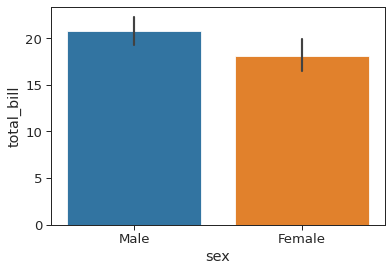

In [ ]:
# bar plot
sns.barplot(x='sex', y='total_bill', data=df2)
# the top vertical bar repreesnts variance between males and total bill amounts and so forth
# by default data is aggregated in form of mean

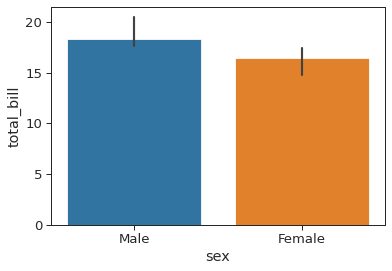

In [ ]:
sns.barplot(x='sex', y='total_bill', data=df2, estimator=np.median) #options std, var, cov, also make our own functions

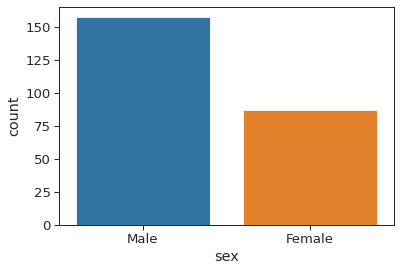

In [ ]:
# count plot
# is like a barplot but estimator counts the no of occurances
sns.countplot(x='sex', data=df2)

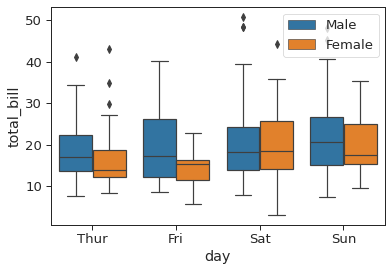

In [ ]:
# box plot
# we can compare diff vars , it shows us quartiles of data
sns.boxplot(x='day', y='total_bill', data=df2, hue='sex') 
# line in middle of box is median , box will extend 1 sd from median, outside of box are whiskers they extend to all of other data asides from data in sd box
# and aside from outliers
# hue will provide us additional way to add another category to plot
plt.legend(loc=0)

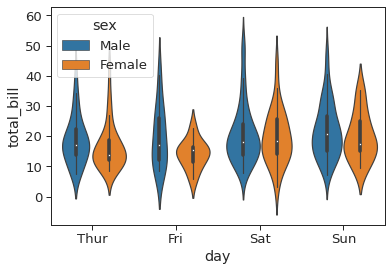

In [ ]:
# violin plot
# it is combination of box and kde plot
sns.violinplot(x='day', y='total_bill', data=df2, hue='sex')
# box plots corresponds to data points , violin plot uses kde estimation of data points

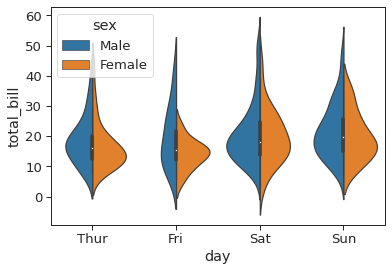

In [ ]:
sns.violinplot(x='day', y='total_bill', data=df2, hue='sex', split=True) # splits lets us compare how categories compare to each othe

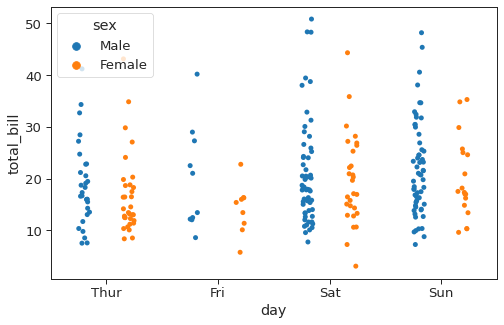

In [ ]:
# strip plot
# it draws scatter plot representin diff data points wher 1 var is categorical 
# they are used show diff observations with boxplot is going to represent avg distributions
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y="total_bill", data=df2, jitter=True, hue='sex', dodge=True)#jitter spreads datapoints so they are not stacked on each other
# dodge will seperate men and women date

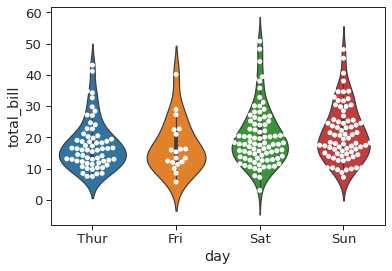

In [ ]:
# swarm plot
# similiar to strip plot but points are adjusted so they dont overlap
sns.violinplot(x='day', y='total_bill', data=df2)
sns.swarmplot(x='day', y='total_bill', data=df2, color='white')

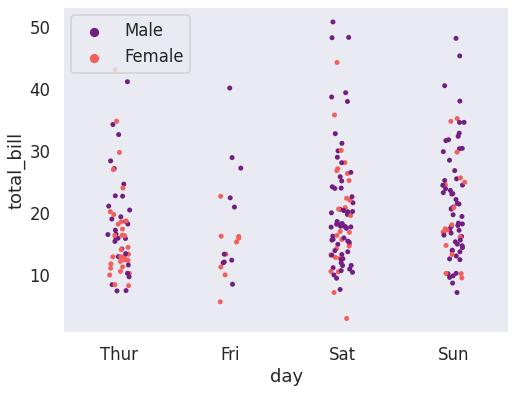

In [ ]:
# palates
# use diff palates to change colors
# refer to matplotlib colormaps form diff options
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=df2, hue='sex', palette='magma')
# upperright=1, upperleft=2, lowerleft=3, lowerright=4, 0 finds best positionl, refer matplotlib docs for more options
plt.legend(loc=0)

In [ ]:
# Matrix plots

In [ ]:
# Heatmaps
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# to create heatmap with data we have to setup in matrix format vars
# 2 ways to do this
df_mtx = df.corr() #correlation tells us how infulential a var is on result
df_mtx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Figure size 576x432 with 0 Axes>

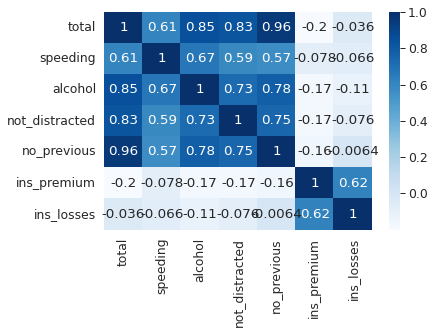

In [ ]:
sns.heatmap(df_mtx, annot=True, cmap='Blues') #colormap=cmap, annot shows nums inside boxes

In [ ]:
# 2nd way - using pivot table
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


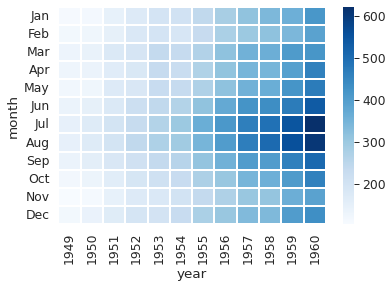

In [ ]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

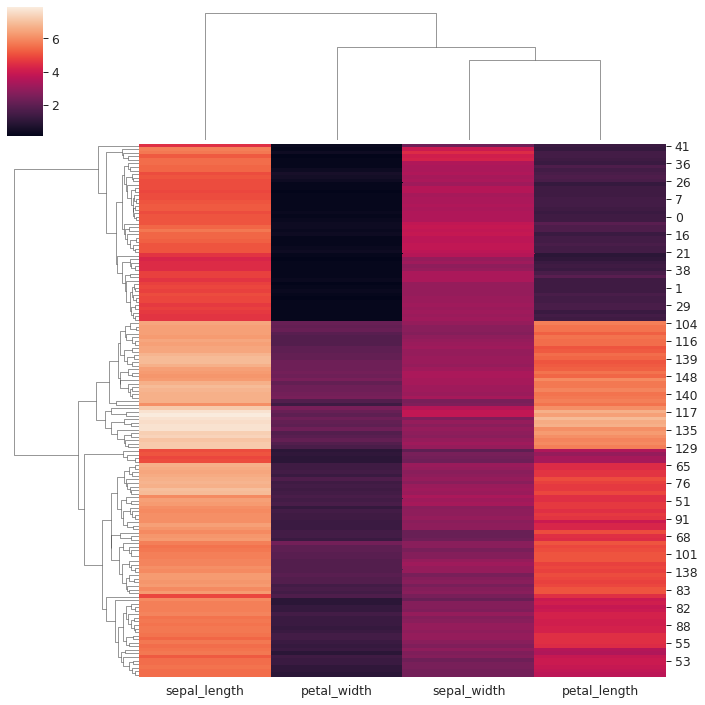

In [ ]:
# cluster maps
iris = sns.load_dataset('iris')
species = iris.pop('species') # divide data based on diff species

sns.clustermap(iris)
# heirarchially clusterd heatmap
# dist btwn points are calculated and closest are joined and this continue to next closest and it compares columns and rows of heatmap

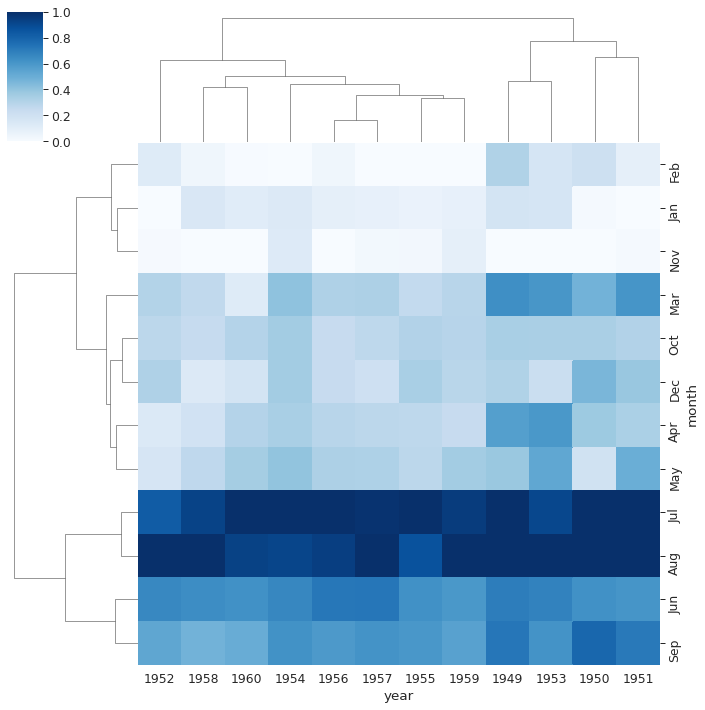

In [ ]:
sns.clustermap(flights, cmap='Blues', standard_scale=1) #sscale will normalize data to focus on clustering 
# here data is repositioned to find cluster of data unlike heatmap

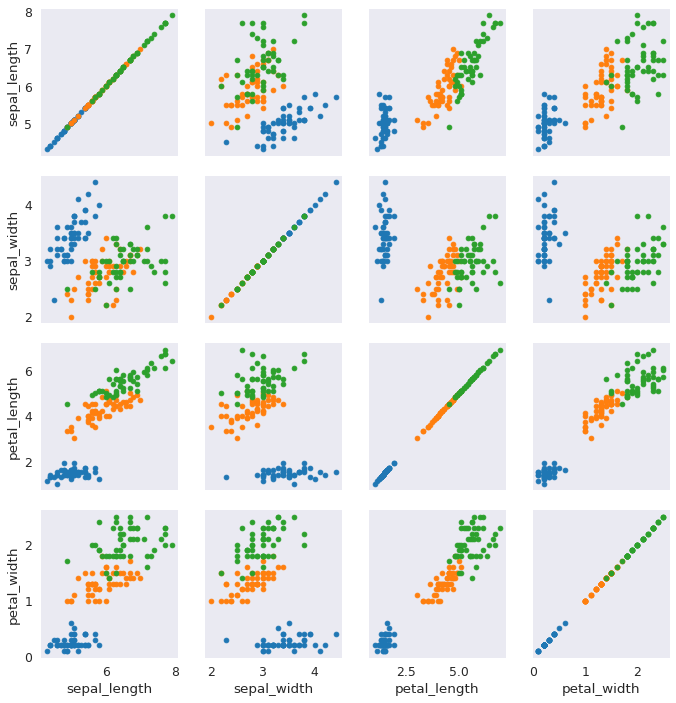

In [ ]:
# pairgrid
# it will control where and what specific plot showup in pairplot
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)
iris_g.map_(plt.scatter)

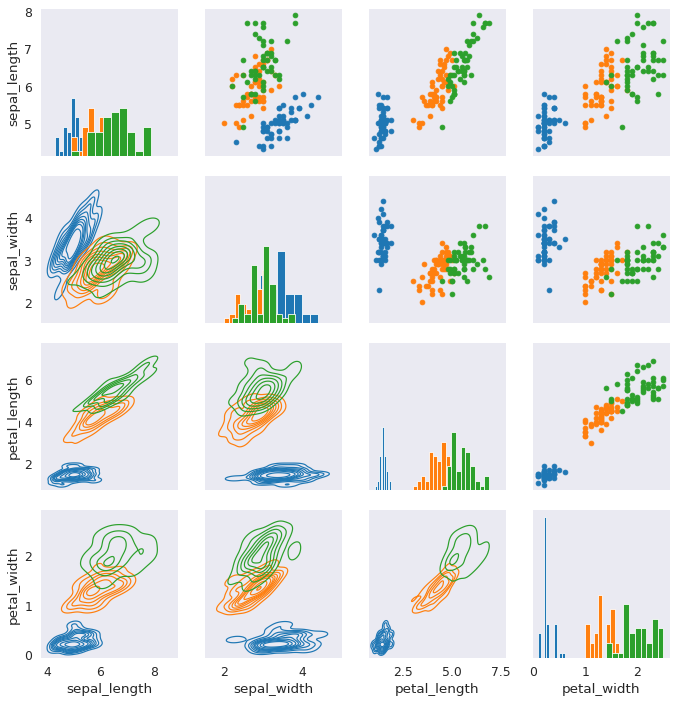

In [ ]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
# iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

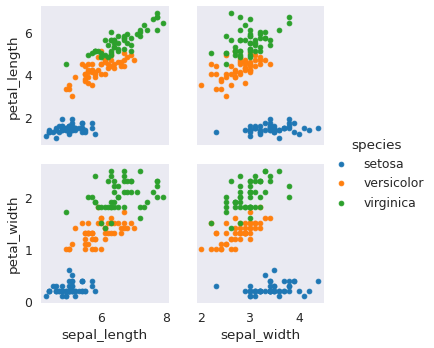

In [ ]:
# use custom vars in grid
iris_g = sns.PairGrid(iris, hue='species', x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

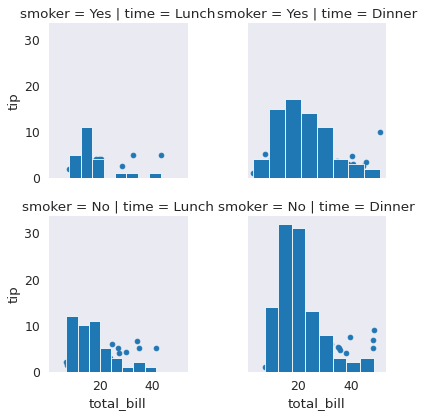

In [ ]:
# Facet grid
# print multiple plots in a grid in which we can define columns and rows
df2_fg = sns.FacetGrid(df2, col='time', row='smoker')
# df2_fg.map(plt.hist, 'total_bill', bins=8) 
# df2_fg.map(plt.scatter, 'total_bill', 'tip') 

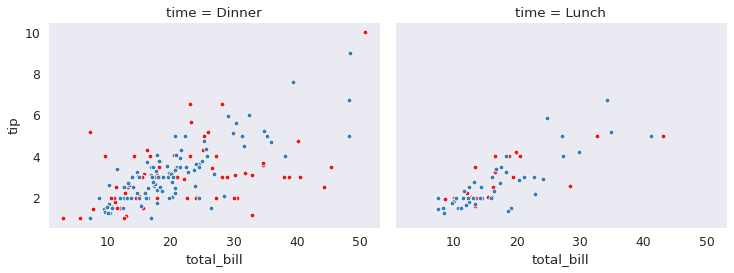

In [ ]:
# assign vars to diff colors
df2_fg = sns.FacetGrid(df2, col='time', hue='smoker',height=4, aspect=1.3,col_order=['Dinner', 'Lunch'], palette='Set1')

df2_fg.map(plt.scatter, 'total_bill','tip', edgecolor='w')

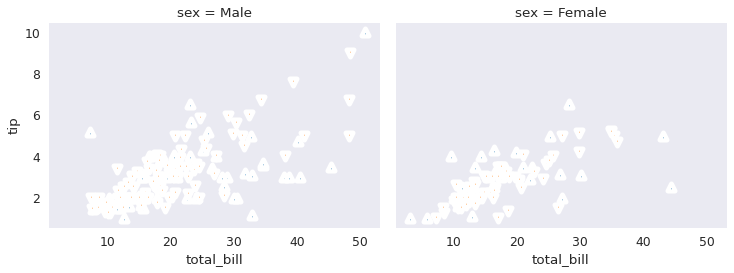

In [ ]:
# to change our markers
kws = dict(s=50, linewidth=5, edgecolor='w')
df2_fg = sns.FacetGrid(df2, col='sex', hue='smoker',height=4, aspect=1.3,hue_order=['Yes','No'], hue_kws=dict(marker=['^','v']))
df2_fg.map(plt.scatter, 'total_bill','tip', **kws)

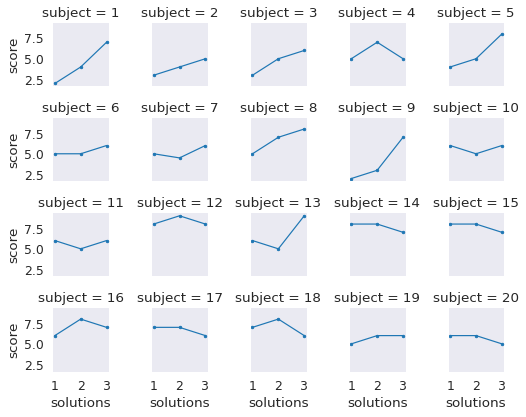

In [ ]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject',col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions','score',marker='.')

In [ ]:
# Regression plots
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

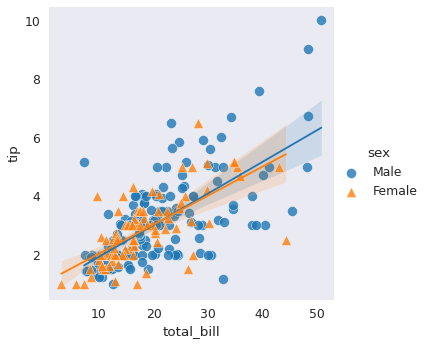

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=df2, markers=['o', '^'], scatter_kws={'s':100, 'linewidth':0.5,'edgecolor':'w'})

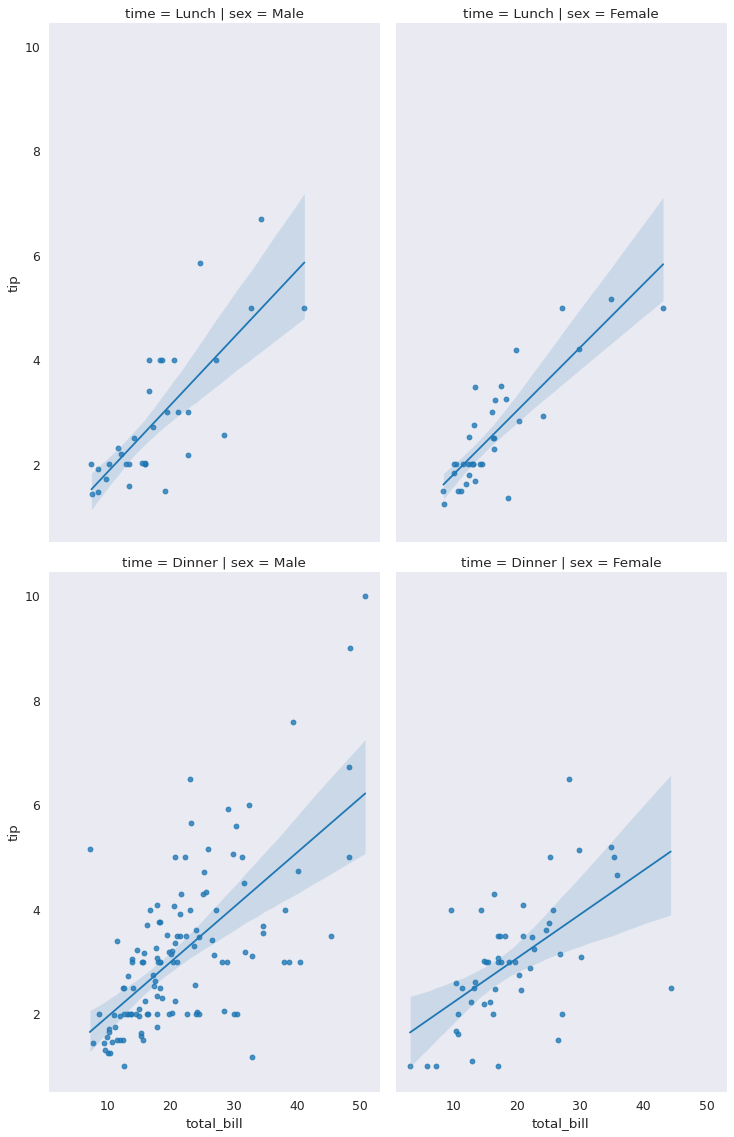

In [ ]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=df2)

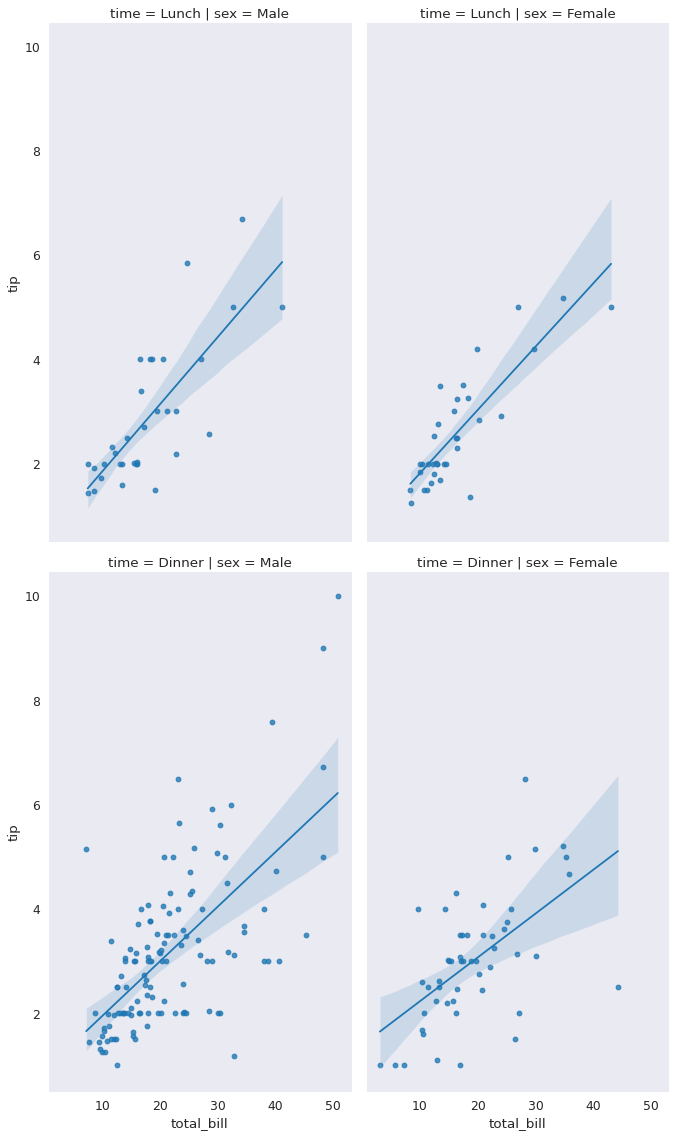

In [98]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=df2, height=8, aspect=0.6)